# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# To be able to import the file
import sys
pathname="/Users/carelchay/Desktop/School/Modules/DSA4262/Project 2/DSA4262-frontasticfour/scripts/utils"
if pathname not in sys.path:
    sys.path.append(pathname)
path_to_data = "/Users/carelchay/Desktop/School/Modules/DSA4262/Project 2/data/data.json"
path_to_labels = "/Users/carelchay/Desktop/School/Modules/DSA4262/Project 2/data/data.info"

In [4]:
import getData as gd
import importlib
importlib.reload(gd)

<module 'getData' from '/Users/carelchay/Desktop/School/Modules/DSA4262/Project 2/DSA4262-frontasticfour/scripts/utils/getData.py'>

In [5]:
getDat = gd.getData(path_to_data=path_to_data, path_to_labels=path_to_labels)

In [6]:
label_df = getDat.get_labels()

# Plot Epochs

In [6]:
epoch_df = pd.read_csv("../../epoch_output.csv")
# epoch_df = epoch_df.iloc[0:200]

In [11]:
# epoch_df2 = pd.read_csv("../../demo_epoch_output.csv")
epoch_df2 = pd.read_csv("../../data/demo_dataset0.csv")

## Entire

In [9]:
# Rolling avg. for validation loss
ravg_val = epoch_df['avg_validation_loss'].rolling(window=10).mean()
# Rolling avg. for Training loss
ravg_train = epoch_df['avg_training_loss'].rolling(window=10).mean()

Text(0, 0.5, 'Loss')

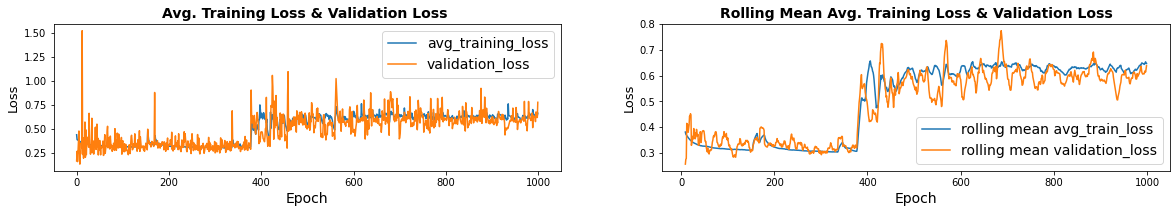

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (20, 2.7))

# fig.subplots_adjust(top=.93)
# plt.suptitle("Avg. Training & Validation Loss (Raw & Rolling Mean)", fontsize=14, fontweight='bold')

ax[0].set_title("Avg. Training Loss & Validation Loss ", fontweight='bold', fontsize = 14)
ax[0].plot(epoch_df['avg_training_loss'], label = "avg_training_loss")
ax[0].plot(epoch_df['avg_validation_loss'], label = "validation_loss")
ax[0].legend(prop={'size':14})
# ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss", fontsize = 13)
ax[0].set_xlabel("Epoch", fontsize = 14)

ax[1].set_title("Rolling Mean Avg. Training Loss & Validation Loss", fontweight='bold', fontsize = 14)
ax[1].plot(ravg_train, label = "rolling mean avg_train_loss")
ax[1].plot(ravg_val, label = "rolling mean validation_loss")
ax[1].legend(prop={'size':14})
ax[1].set_xlabel("Epoch", fontsize = 14)
ax[1].set_ylabel("Loss", fontsize = 13)

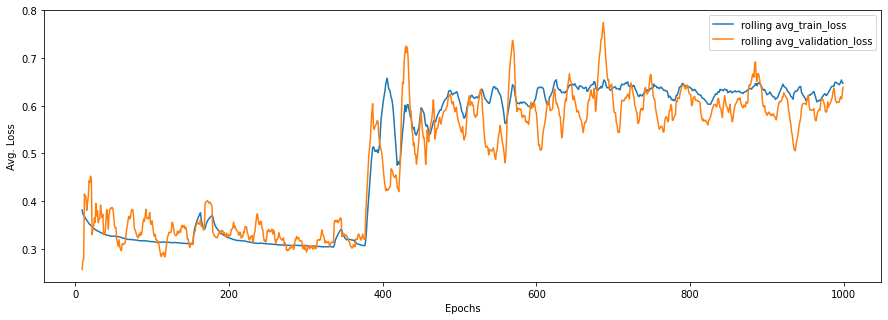

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

plt.plot(ravg_train, label = "rolling avg_train_loss")
plt.plot(ravg_val, label = "rolling avg_validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Avg. Loss")
plt.legend()

## Sliced

In [41]:
slc = [0,200]
w = 10
# Rolling avg. for validation loss
ravg_val = epoch_df.loc[slc[0]:slc[1], 'avg_validation_loss'].rolling(window=w).mean()
# Rolling avg. for Training loss
ravg_train = epoch_df.loc[slc[0]:slc[1], 'avg_training_loss'].rolling(window=w).mean()

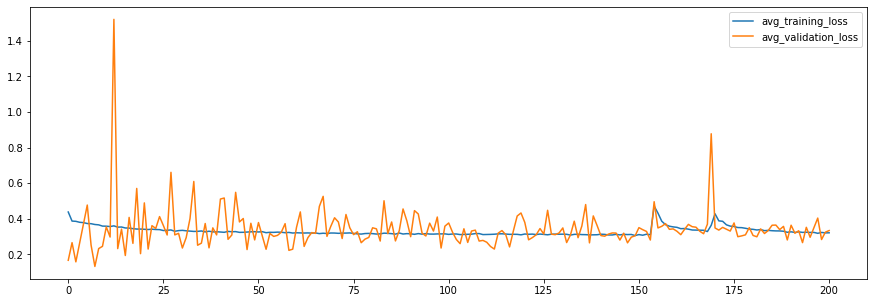

In [42]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

plt.plot(epoch_df.loc[slc[0]:slc[1],'avg_training_loss'], label = "avg_training_loss")
plt.plot(epoch_df.loc[slc[0]:slc[1],'avg_validation_loss'], label = "avg_validation_loss")
plt.legend()

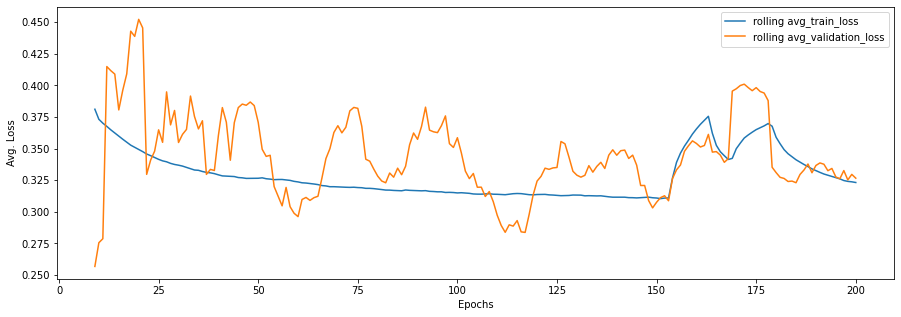

In [43]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

plt.plot(ravg_train, label = "rolling avg_train_loss")
plt.plot(ravg_val, label = "rolling avg_validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Avg. Loss")
plt.legend()

In [20]:
epoch_df.iloc[250:350, :]

,epoch_num,avg_loss
250,250,0.296084
251,251,0.292606
252,252,0.297105
253,253,0.296699
254,254,0.294594
...,...,...
345,345,0.287842
346,346,0.287937
347,347,0.282414
348,348,0.287777


In [25]:
epoch_df.sort_values("avg_loss", ascending=True)

,epoch_num,avg_loss
347,347,0.282414
358,358,0.282915
350,350,0.283049
355,355,0.283093
340,340,0.283446
...,...,...
364,364,0.537961
372,372,0.548731
369,369,0.563755
371,371,0.579615


# Compare predictions with Truth

In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/submission/frontasticfour_dataset0_1.csv")
df2 = pd.read_csv("../../data/submission/dataset0_scoresrf.csv")

In [26]:
pred_df = pd.merge(df, label_df[['transcript_id', 'transcript_position', 'label']], 
                  how = 'left', on = ('transcript_id', 'transcript_position'))

pred_df2 = pd.merge(df2, label_df[['transcript_id', 'transcript_position', 'label']], 
                  how = 'left', on = ('transcript_id', 'transcript_position'))

In [28]:
print(pred_df.shape)
print(pred_df2.shape)
print(label_df.shape)

(121838, 4)
(121838, 4)
(121838, 4)


In [13]:
# Threshold
thresh = 0.9
pred_df['pred'] = pred_df['score'].apply(lambda x : 1 if x>thresh else 0)
pred_df

,transcript_id,transcript_position,score,label,pred
0,ENST00000000233,244,0.071954,0,0
1,ENST00000000233,261,0.039076,0,0
2,ENST00000000233,316,0.035678,0,0
3,ENST00000000233,332,0.333933,0,0
4,ENST00000000233,368,0.407557,0,0
...,...,...,...,...,...
121833,ENST00000641834,1348,0.980508,1,1
121834,ENST00000641834,1429,0.062326,0,0
121835,ENST00000641834,1531,0.994412,1,1
121836,ENST00000641834,1537,0.447808,0,0


## Classification report

In [14]:
pred_df.head()

,transcript_id,transcript_position,score,label,pred
0,ENST00000000233,244,0.071954,0,0
1,ENST00000000233,261,0.039076,0,0
2,ENST00000000233,316,0.035678,0,0
3,ENST00000000233,332,0.333933,0,0
4,ENST00000000233,368,0.407557,0,0


In [15]:
true_labels = pred_df['label'].to_list()
pred_labels = pred_df['pred'].to_list()
scores = pred_df['score'].to_list()

In [16]:
from sklearn import metrics
# Get AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(true_labels, pred_labels, pos_label=1)
auc_scorerf = metrics.auc(fpr, tpr)

# fpr, tpr, thresholds = metrics.roc_curve(y_test, dummypred, pos_label=1)
# auc_scoredummy = metrics.auc(fpr, tpr)

# Get PR Score
pr_scorerf = metrics.average_precision_score(true_labels, pred_labels, pos_label=1)
# pr_scoredummy = average_precision_score(y_test, dummypred, pos_label=1)

print(f"AUC Score : {auc_scorerf}")
print(f"PR Score : {pr_scorerf}")

AUC Score : 0.7240453152877723
PR Score : 0.2964940873831841


In [17]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    116363
           1       0.59      0.46      0.52      5475

    accuracy                           0.96    121838
   macro avg       0.78      0.72      0.75    121838
weighted avg       0.96      0.96      0.96    121838



## PLOT ROC & PR

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(true_labels, scores)
auc_score = auc(recall, precision)
auc_score

0.5279897687646606

In [20]:
scores= pred_df['score']

In [21]:
roc_auc_score(true_labels, scores)

0.9488521233957805

In [34]:
scores_m6a = pred_df['score'].to_list()
scores_rf = pred_df2['score'].to_list()

### ROC

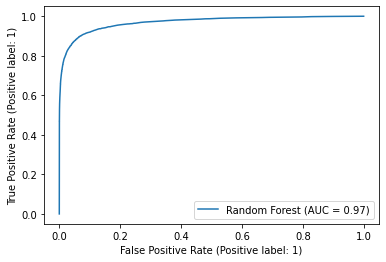

In [53]:
plta = RocCurveDisplay.from_predictions(true_labels, scores_rf, name = "Random Forest")

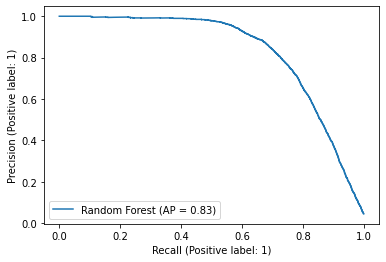

In [56]:
pltb = PrecisionRecallDisplay.from_predictions(true_labels, scores_rf, name = 'Random Forest')

In [72]:
label_df['label'].value_counts(normalize = True)*100

0    95.506328
1     4.493672
Name: label, dtype: float64

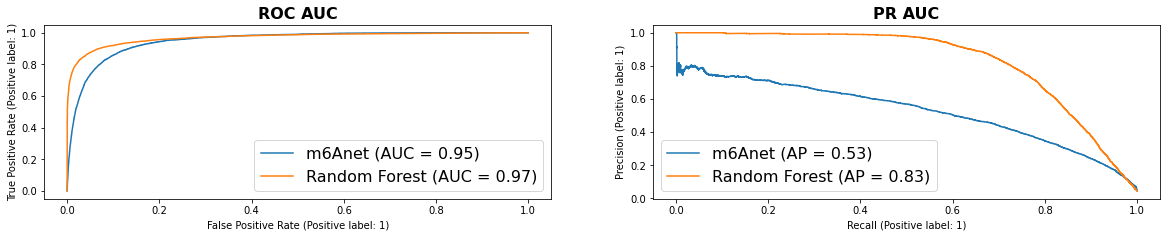

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (20, 3.2))
RocCurveDisplay.from_predictions(true_labels, scores_m6a, name = "m6Anet", ax = ax[0])
plta.plot(ax = ax[0])
ax[0].set_title("ROC AUC", fontweight = "bold", fontsize = 16)
ax[0].legend(prop={'size':16})

PrecisionRecallDisplay.from_predictions(true_labels, scores_m6a, name = "m6Anet", ax = ax[1])
pltb.plot(ax = ax[1])
ax[1].set_title("PR AUC", fontweight = "bold", fontsize = 16)
ax[1].legend(prop={'size':16})


### PR

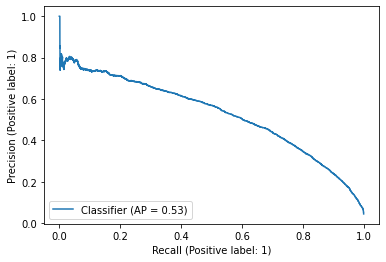

In [57]:
PrecisionRecallDisplay.from_predictions(true_labels, scores_m6a)

## Compared to random

In [60]:
import random

In [72]:
size=df.shape[0]
rand_score = [random.uniform(0, 1) for i in range(size)]

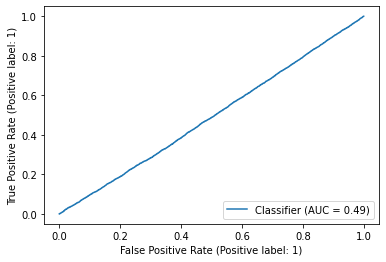

In [73]:
RocCurveDisplay.from_predictions(true_labels, rand_score)

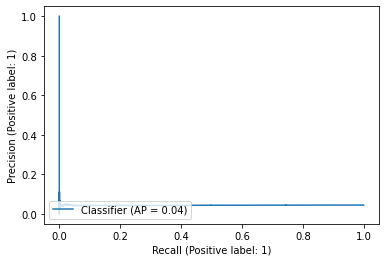

In [74]:
PrecisionRecallDisplay.from_predictions(true_labels, rand_score)